In [78]:
import numpy as np
%matplotlib inline

from netCDF4 import Dataset

rootgrp = Dataset('/Users/garmu/Downloads/CloudData/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG3+SEVIRI_C_EUMG_20140409124511.nc', 'r', format='NETCDF4')
print (rootgrp.data_model)
rootgrp.close()

NETCDF3_CLASSIC


In [79]:
def walktree(top):
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walktree(value):
            yield children
            
path='/Users/garmu/Downloads/CloudData/'
fname='IT_ABI-L2-CMIPF-M3C01_G16_s2005155201500_e2005155203700_c2014058132255.nc'
fname='IT_ABI-L2-CMIPF-M3C04_G16_s2005155201500_e2005155203700_c2014058132255.nc'
fname='W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG3+SEVIRI_C_EUMG_20140409124511.nc'
#fname='W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MET7+MVIRI_C_EUMS_20150908230000.nc'
rootgrp = Dataset(path+fname, 'r', format='NETCDF4')
print (rootgrp.data_model)
print (rootgrp)
for children in walktree(rootgrp):
    for child in children:
        print (child)

NETCDF3_CLASSIC
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    creator_name: EUMETSAT
    creator_url: http://www.eumetsat.int
    creator_email: ops@eumetsat.int
    institution: EUMETSAT
    license: CopyRight EUMETSAT 2014
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    title: High Rate SEVIRI Level 1.5 Image Data - MSG - 0 degree
    title_short_name: MSG15
    summary: NA
    references: http://www.eumetsat.int/Home/Main/DataAccess/Resources/index.htm?l=en
    comment: Rectified (level 1.5) Meteosat SEVIRI image data. The data is transmitted as High Rate transmissions in 12 spectral channels. Level 1.5 image data corresponds to the geolocated and radiometrically pre-processed image data, ready for further processing, ...
    keywords: EUMETSAT, DATA CENTRE, MSG, SEVIRI, NetCDF
    history: 2014-04-11 14:58:13 UTC EUMETSAT
    reference_url: http://navigator.eumetsat.int/discovery/Start/Direc

0.0
-1.42190545611 25.1760907229


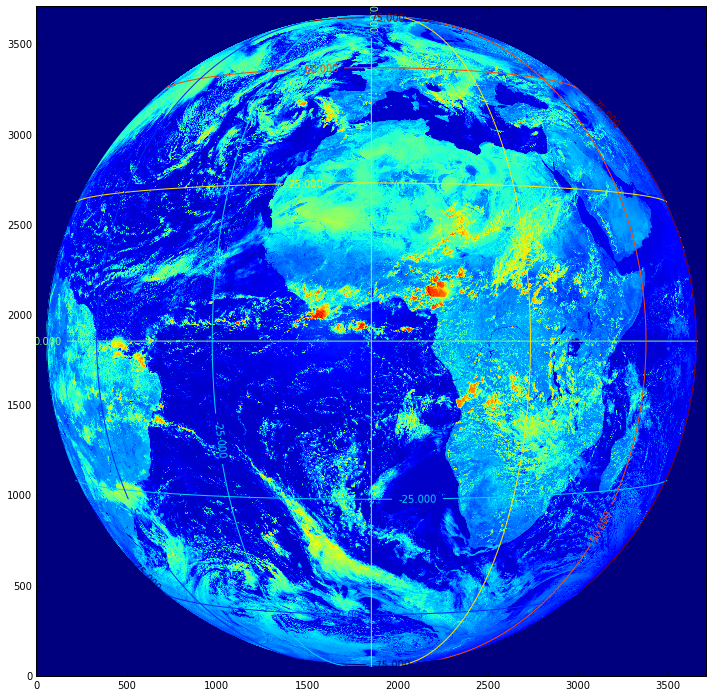

In [80]:

import matplotlib.pyplot as plt
%matplotlib inline

lat=rootgrp.variables["lat"][:,:]
lon=rootgrp.variables["lon"][:,:]
#nom_sat_in_degree=rootgrp.nom_sat_in_degree
nom_sat_in_degree=rootgrp.nominal_longitude

print (nom_sat_in_degree)

lab="ch2"
dat=rootgrp.variables[lab][:,:]

fig = plt.figure(figsize=(12,12))

plt.imshow( (dat), origin='lower')
clat=plt.contour (lat)
clon=plt.contour (lon)
plt.clabel(clon, inline=1, fontsize=10)
plt.clabel(clat, inline=1, fontsize=10)
plt.savefig('indianocean.png')


imin=np.min(dat)
imax=np.max(dat)

print (imin, imax)



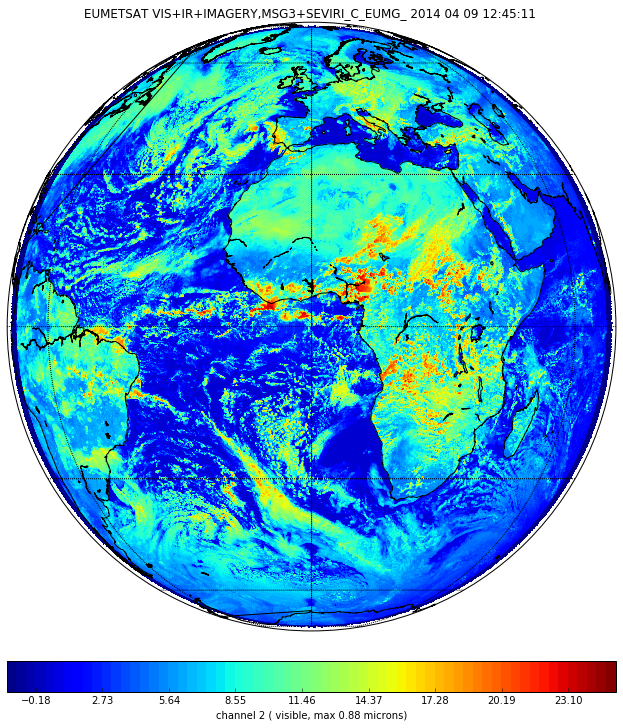

In [81]:


from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(12,12))

m = Basemap(projection='ortho',lon_0=nom_sat_in_degree,lat_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
ny = dat.shape[0]; nx = dat.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lon, lat) 
imin=np.min(dat)
imax=np.max(dat)

clevs = np.linspace(imin,imax,num=65)
cs = m.contourf(x,y, dat,clevs, origin='upper')
#m.drawmapboundary(fill_color='aqua')
plt.title("EUMETSAT VIS+IR+IMAGERY,MSG3+SEVIRI_C_EUMG_ 2014 04 09 12:45:11 ")

cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('channel 2 ( visible, max 0.88 microns)')

plt.savefig('eumetsat.png')

plt.show()


In [82]:
def notworking(test):
    import numpy as np
    from pyresample import image, geometry

    area_def = geometry.AreaDefinition('msg_full', 'Full globe MSG image 0 degrees',
                                    'msg_full',
                                    {'a': '6378169.0', 'b': '6356584.0',
                                     'h': '35785831.0', 'lon_0': '0',
                                     'proj': 'geos'},
                                    3712, 3712,
                                    [-5568742.4, -5568742.4,
                                     5568742.4, 5568742.4])

    msg_area  = geometry.AreaDefinition('areaD', 'Europe (3km, HRV, VTC)', 'areaD',
                                    {'a': '6378144.0', 'b': '6356759.0',
                                     'lat_0': '50.00', 'lat_ts': '50.00',
                                     'lon_0': '8.00', 'proj': 'stere'},
                                    800, 800,
                                    [-1370912.72, -909968.64,
                                     1029087.28, 1490031.36])

    data = dat
    msg_con_quick = image.ImageContainerQuick(data, msg_area)
    area_con_quick = msg_con_quick.resample(area_def)
    result_data_quick = area_con_quick.image_data
    msg_con_nn = image.ImageContainerNearest(data, msg_area, radius_of_influence=50000)
    area_con_nn = msg_con_nn.resample(area_def)
    result_data_nn = area_con_nn.image_data

In [83]:
#from matplotlib.mlab import griddata
from scipy.interpolate import griddata
import time

# set up a square grid with the same extents as our measured data
numcols, numrows = 1000, 1000


lon2=np.ravel(lon)
lat2=np.ravel(lat)
dat2=np.ravel(data)

lon2=(lon)
lat2=(lat)
dat2=(data)



print  (lon2.shape)

xi = np.linspace(lon2.min(), lon2.max(), numcols)
yi = np.linspace(lat2.min(), lat2.max(), numrows)
# get lon and lat coords of our grid points
xi, yi = np.meshgrid(xi, yi)
# interpolate
x, y, z = lon2, lat2, dat2
#zi = griddata(x, y, z, xi, yi)


lon2=np.ravel(lon)
lat2=np.ravel(lat)
dat2=np.ravel(data)

pts =zip(lon2,lat2)

pts = np.transpose(np.vstack((lon2, lat2)))

print (pts.shape) 


z=dat2

gridx = xi
gridy = yi


from scipy.interpolate import griddata
start = time.clock()

grid = griddata(pts,z,(gridx,gridy), method='linear',fill_value=-3e30)

print ("Time to interpolate", (time.clock() - start)*60, " minutes")

(3712, 3712)
(13778944, 2)
Time to interpolate 10200.145740000007  minutes


(1000, 1000)


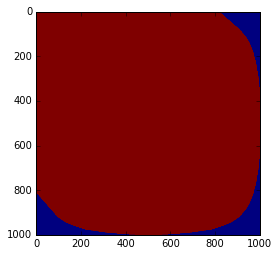

In [84]:
print (grid.shape)

plt.imshow(grid)
plt.show()

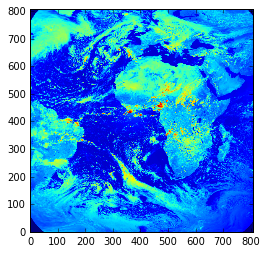

In [85]:
beg=90
end=900
plt.imshow(grid[beg:end,beg:end], origin='lower')

plt.savefig('projectlat.png')
